<a href="https://colab.research.google.com/github/Deepan-mn/Machine-Learning-Projects/blob/main/Cat%20Vs%20Dog%20Classification%20using%20CNN/Cat_Vs_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset Information
The training archive contains 25,000 images of dogs and cats. 

## Download Dataset


In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2021-11-06 11:55:42--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.203.112.106, 2600:1407:3c00:108c::e59, 2600:1407:3c00:10a2::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.203.112.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.1’

kagglecatsanddogs_3 100%[===================>] 786.68M   153MB/s    in 5.2s    

2021-11-06 11:55:47 (150 MB/s) - ‘kagglecatsanddogs_3367a.zip.1’ saved [824894548/824894548]



In [ ]:
!unzip kagglecatsanddogs_3367a.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import tqdm # it tracks the loading time
import os
import tensorflow 
from tensorflow.keras.preprocessing.image import load_img
import PIL
import PIL.Image
warnings.filterwarnings('ignore')

## Create Dataframe for Input and Output

In [ ]:
input_path =[]
label=[]

for category in os.listdir("/content/PetImages"):
  for path in os.listdir("/content/PetImages/"+category):
    if category =='Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages",category,path)) 
print(input_path[0],label[0])

PetImages/Dog/11551.jpg 1


In [ ]:
len(input_path)

25002

In [ ]:
df =pd.DataFrame()
df['images'] =input_path
df['label'] = label
df =df.sample(frac=1).reset_index(drop=True)  # we will shuffle the data or ///from sklearn.utils import shuffle //df = shuffle(df)
df.head() 

images  label
0   PetImages/Dog/1746.jpg      1
1   PetImages/Cat/4458.jpg      0
2  PetImages/Cat/11215.jpg      0
3   PetImages/Cat/7006.jpg      0
4  PetImages/Dog/11551.jpg      1

In [ ]:
df['label']=df['label'].astype('str')   # label is 0 and 1 so we are converting into string

In [ ]:
df.head()

images  label
0   PetImages/Dog/1746.jpg      1
1   PetImages/Cat/4458.jpg      0
2  PetImages/Cat/11215.jpg      0
3   PetImages/Cat/7006.jpg      0
4  PetImages/Dog/11551.jpg      1

In [ ]:
# delete db files
# for i in df['images']:
#   if '.jpg' not in i:
#     print(i)
df=df[df['images']!='/content/PetImages/Dog/Thumbs.db']
df=df[df['images']!='/content/PetImages/Cat/Thumbs.db']
len(df)

25002

In [ ]:
import PIL
l =[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [ ]:
df=df[df['images']!='PetImages/Cat/666.jpg']
df=df[df['images']!='PetImages/Dog/11702.jpg']
df=df[df['images']!='PetImages/Dog/Thumbs.db']
df=df[df['images']!='PetImages/Cat/Thumbs.db']
len(df)

24998

In [ ]:
cd /content

/content


## Exploratory Data Analysis

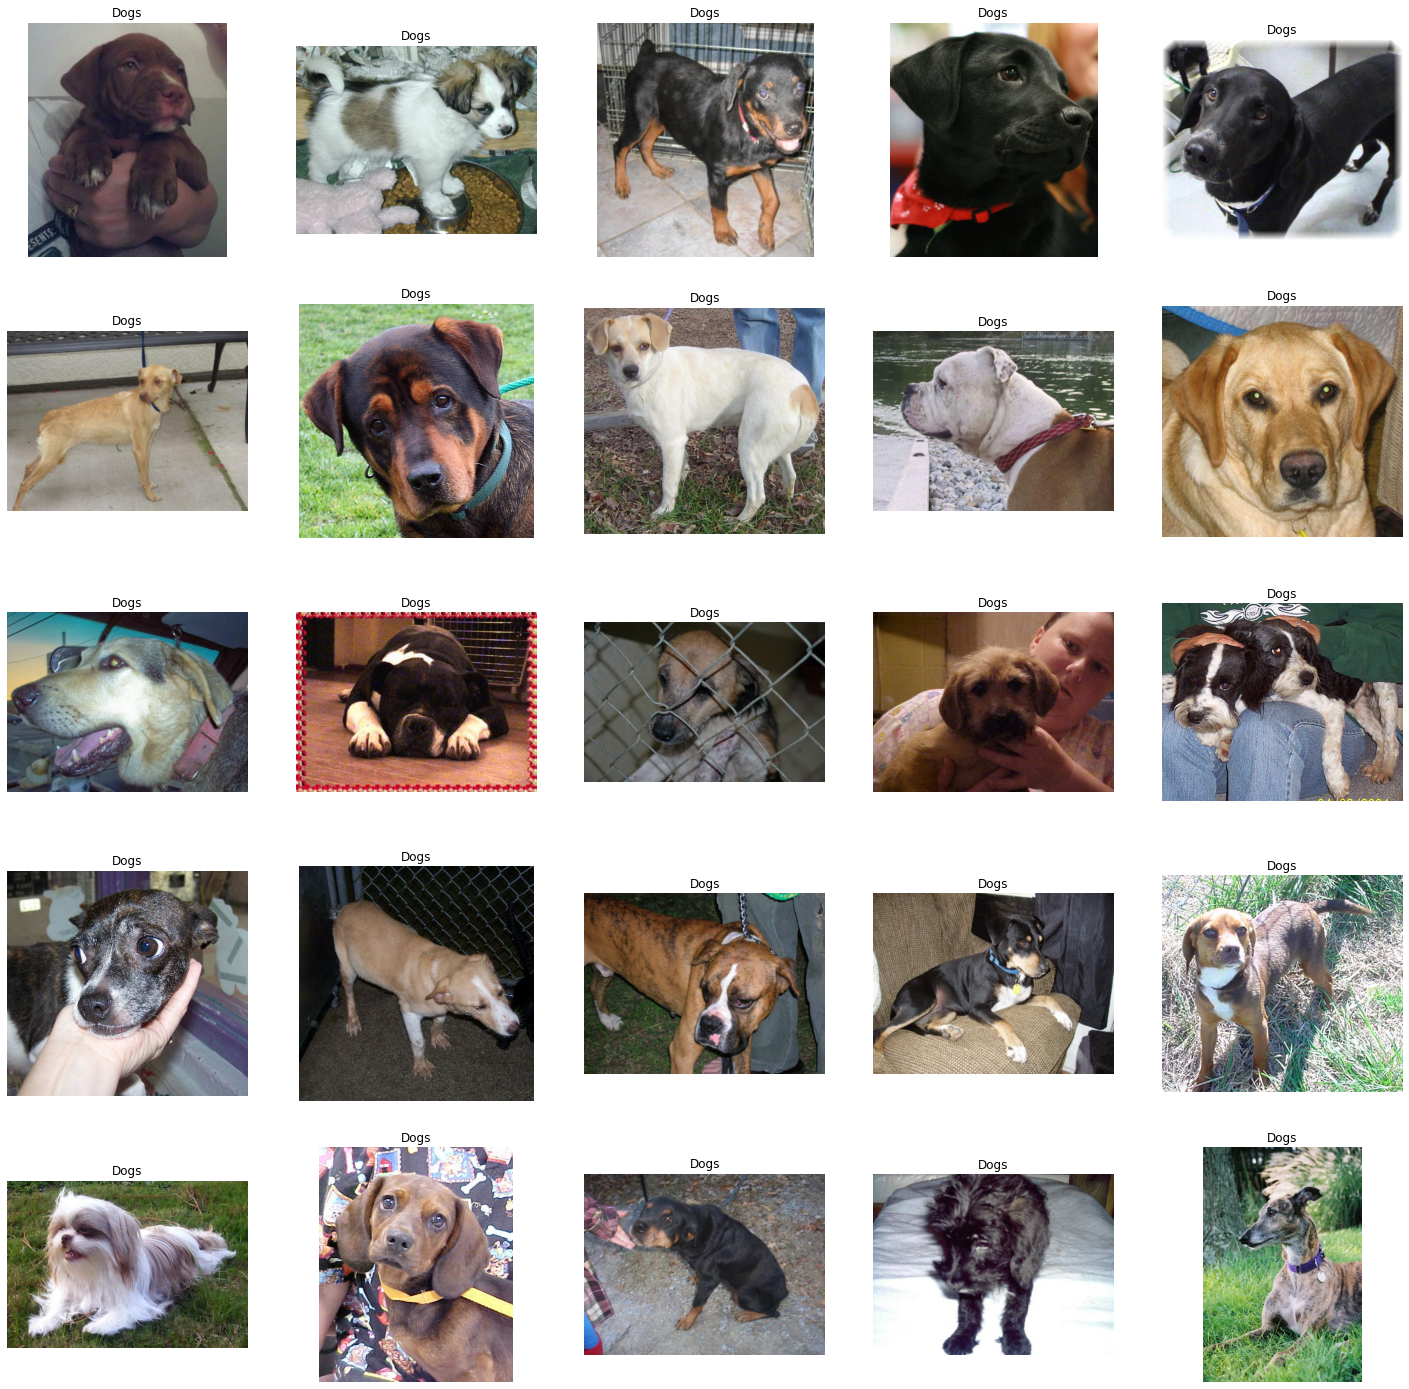

In [ ]:
# to diplay grid of images
plt.figure(figsize=(25,25))
temp= df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  #img = PIL.Image.open(file)
  img  = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

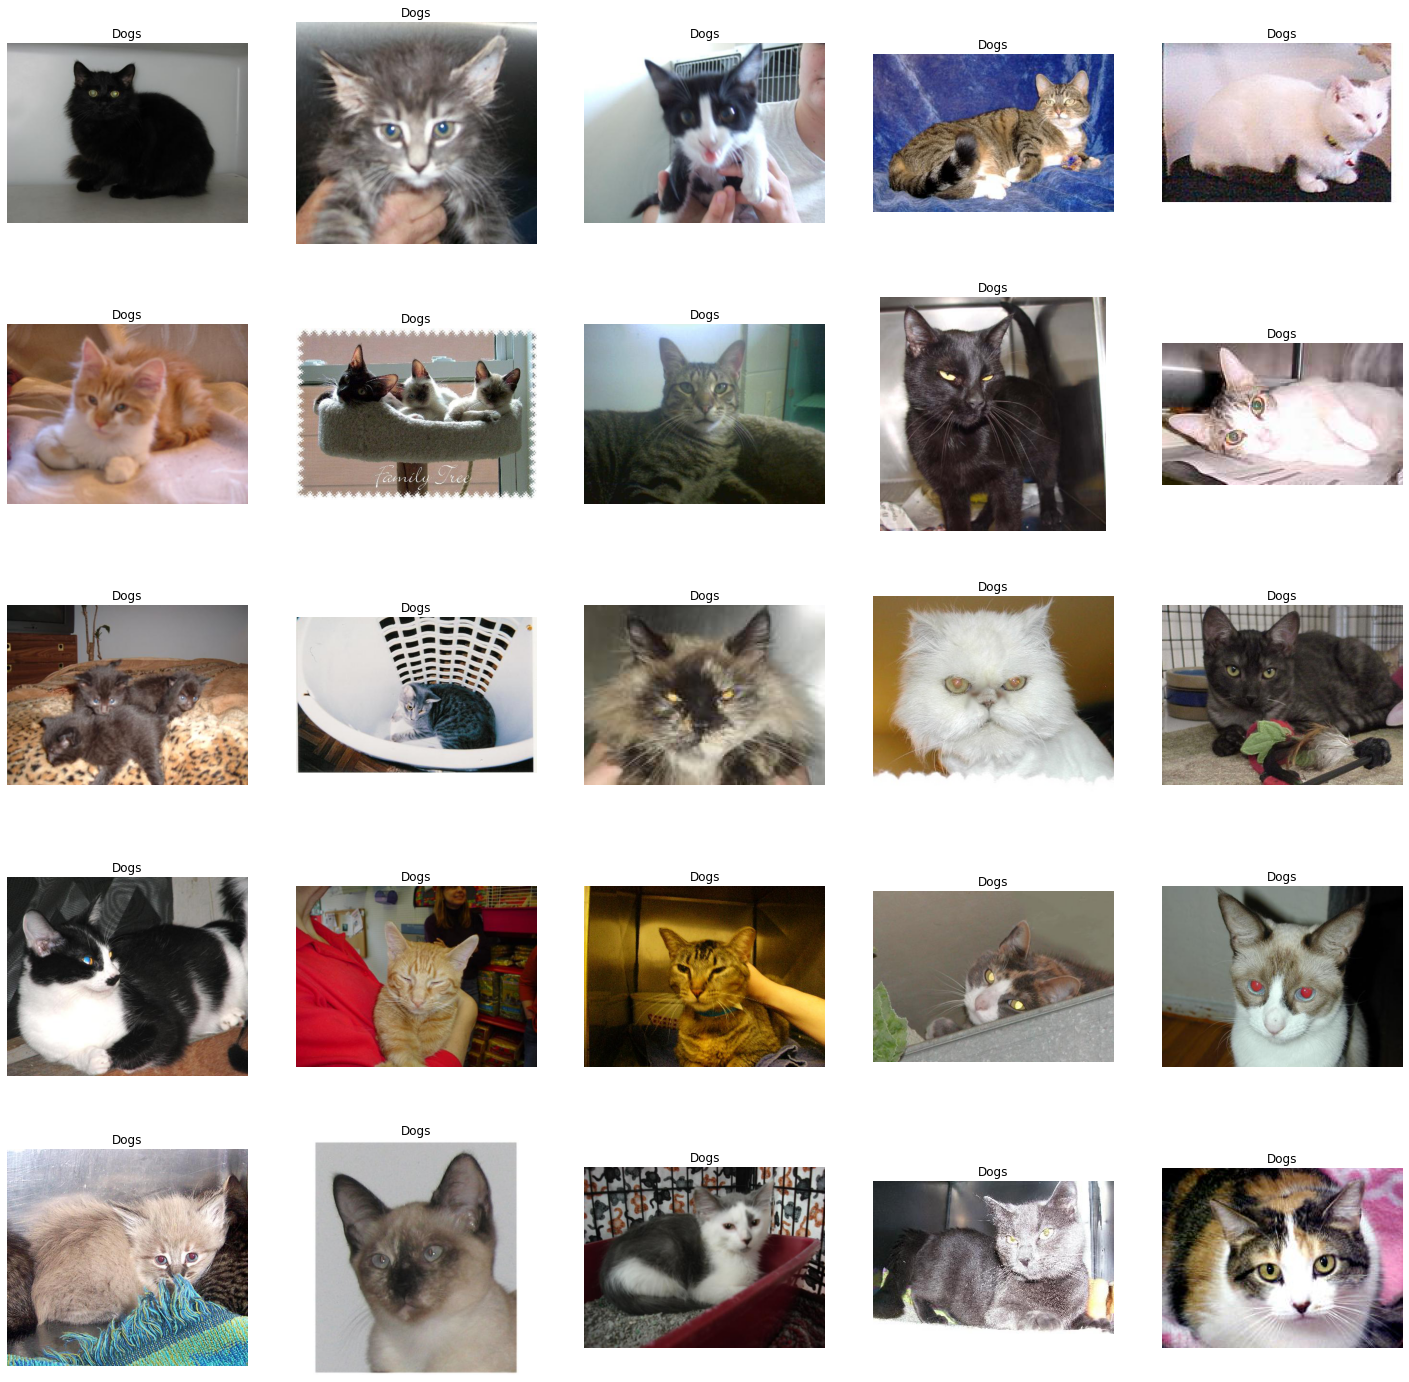

In [ ]:
# to diplay grid of images
plt.figure(figsize=(25,25))
temp= df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  #img = PIL.Image.open(file)
  img  = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

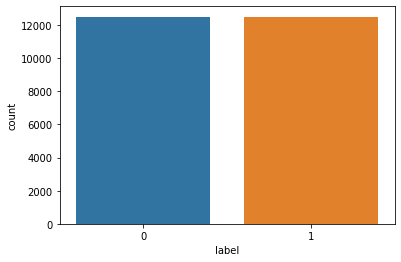

In [ ]:
# count the category
import seaborn as sns
sns.countplot(df['label'])

## Create DataGenerator for the Images

In [ ]:
# we can load in RAM but it occupy more spaces 
# so instead of loading in RAM we are using DATAGENERATORS
#because if you not having enough RAM the entire system will crash so better using Datagenerators

In [ ]:
#input split
from sklearn.model_selection import train_test_split
train, test =train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
train.head()

images label
23290   PetImages/Dog/7034.jpg     1
17783  PetImages/Cat/10867.jpg     0
1020   PetImages/Cat/10837.jpg     0
12646   PetImages/Cat/9113.jpg     0
1533    PetImages/Cat/7355.jpg     0

In [ ]:
test.head()

images label
6869   PetImages/Cat/1804.jpg     0
22914  PetImages/Cat/9009.jpg     0
9670   PetImages/Dog/2930.jpg     1
13640  PetImages/Cat/5892.jpg     0
23341  PetImages/Dog/1500.jpg     1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# normalization is must , if want augumentation we can do (only for train set not for test)
train_generator =ImageDataGenerator(
    rescale = 1./255,   # normalization of images
    rotation_range =40, # augmentation purpose to avoid overfitting
    shear_range = 0.2, # augmentation is one of the 
    zoom_range =0.2,   # regularization method
    horizontal_flip =True, # since model will mug up 
    fill_mode ='nearest'  #and it will not perform well in training data
)
val_generator =ImageDataGenerator(
    rescale =1./255
)
 
 #iterator the images
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=64,
    class_mode='binary'
    )

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
    )


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense
# Dropout can use if augmentation is not done

In [ ]:
model=tensorflow.keras.Sequential([
                  Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                  MaxPool2D((2,2)),

                  Conv2D(32,(3,3),activation='relu'),
                  MaxPool2D((2,2)),

                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D((2,2)),

                  Flatten(),

                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
history = model.fit(
    train_iterator,
    epochs=50,
    validation_data = val_iterator
    )

Epoch 1/50
313/313 [==============================] - 191s 512ms/step - loss: 0.6377 - accuracy: 0.6290 - val_loss: 0.5847 - val_accuracy: 0.7022
Epoch 2/50
313/313 [==============================] - 159s 508ms/step - loss: 0.5637 - accuracy: 0.7055 - val_loss: 0.5075 - val_accuracy: 0.7470
Epoch 3/50
313/313 [==============================] - 159s 508ms/step - loss: 0.5193 - accuracy: 0.7421 - val_loss: 0.4786 - val_accuracy: 0.7684
Epoch 4/50
313/313 [==============================] - 159s 507ms/step - loss: 0.4931 - accuracy: 0.7574 - val_loss: 0.4426 - val_accuracy: 0.7962
Epoch 5/50
313/313 [==============================] - 159s 509ms/step - loss: 0.4649 - accuracy: 0.7805 - val_loss: 0.4470 - val_accuracy: 0.7898
Epoch 6/50
313/313 [==============================] - 159s 509ms/step - loss: 0.4437 - accuracy: 0.7922 - val_loss: 0.3968 - val_accuracy: 0.8240
Epoch 7/50
313/313 [==============================] - 159s 509ms/step - loss: 0.4272 - accuracy: 0.8032 - val_loss: 0.4022 -

### Visualization of Results

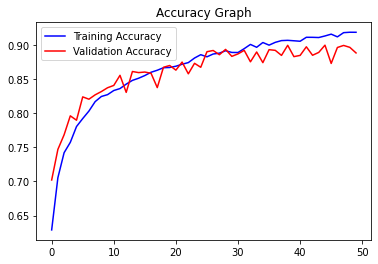

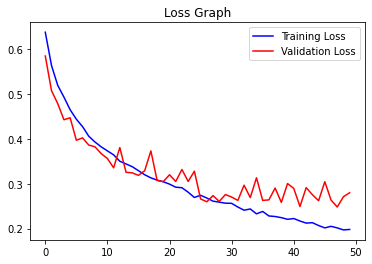

In [ ]:
# Accuracy Graph
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()


# Loss Graph
loss =history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
model.get_weights()

[array([[[[ 1.30550653e-01,  4.57348153e-02,  2.97065437e-01,
            5.41638061e-02,  2.48932049e-01, -6.05129413e-02,
            3.64366993e-02, -4.19880152e-02,  1.32937776e-02,
           -2.85748959e-01,  2.69445598e-01, -2.18349934e-01,
            2.53764540e-01, -1.66793346e-01,  2.93998241e-01,
           -1.19167536e-01],
          [ 3.98551151e-02, -4.41588312e-02,  2.25733429e-01,
            1.96758732e-01,  1.09183617e-01, -1.15253285e-01,
            2.05460619e-02, -1.33578822e-01,  3.19762141e-01,
            1.82647128e-02, -2.28470251e-01, -2.17463762e-01,
           -1.28981995e-03, -3.45528387e-02,  2.11907595e-01,
            2.03071415e-01],
          [-1.56220749e-01,  1.38177890e-02,  1.18327081e-01,
            4.50206362e-02,  2.55978674e-01, -2.08495259e-01,
           -5.06726056e-02,  6.86181858e-02,  3.14841479e-01,
           -4.25938852e-02, -7.18445182e-02, -2.30790043e-04,
            2.39605382e-01, -1.82152152e-01,  5.73353469e-01,
           -

In [ ]:
model.optimizer

## Save Your Model

In [ ]:
import os.path
if os.path.isfile('/content/models/CatVsDogModel_version_2.h5') is False:
  model.save('/content/models/CatVsDogModel_version_2.h5')
else:
  print("model didn't save")

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('/content/models/CatVsDogModel_version_2.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [ ]:
new_model.get_weights()

[array([[[[ 1.30550653e-01,  4.57348153e-02,  2.97065437e-01,
            5.41638061e-02,  2.48932049e-01, -6.05129413e-02,
            3.64366993e-02, -4.19880152e-02,  1.32937776e-02,
           -2.85748959e-01,  2.69445598e-01, -2.18349934e-01,
            2.53764540e-01, -1.66793346e-01,  2.93998241e-01,
           -1.19167536e-01],
          [ 3.98551151e-02, -4.41588312e-02,  2.25733429e-01,
            1.96758732e-01,  1.09183617e-01, -1.15253285e-01,
            2.05460619e-02, -1.33578822e-01,  3.19762141e-01,
            1.82647128e-02, -2.28470251e-01, -2.17463762e-01,
           -1.28981995e-03, -3.45528387e-02,  2.11907595e-01,
            2.03071415e-01],
          [-1.56220749e-01,  1.38177890e-02,  1.18327081e-01,
            4.50206362e-02,  2.55978674e-01, -2.08495259e-01,
           -5.06726056e-02,  6.86181858e-02,  3.14841479e-01,
           -4.25938852e-02, -7.18445182e-02, -2.30790043e-04,
            2.39605382e-01, -1.82152152e-01,  5.73353469e-01,
           -

In [ ]:
new_model.optimizer

In [ ]:
import cv2
import tensorflow as tf
from PIL import Image
import numpy


## Predict Your Custom Data

In [ ]:
CATEGORIES = {
    0:"Cat",
    1:"DOG"
}

def prepare(filepath):
  img =Image.open(filepath)
  img=img.resize((128,128))
  img=numpy.expand_dims(img,axis=0)
  img=numpy.array(img)
  return img



In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
model =tf.keras.models.load_model('/content/models/CatVsDogModel_version_2.h5')

In [ ]:
prediction =model.predict([prepare('/content/cat.2.jpg')])
print(CATEGORIES[int(prediction[0][0])])

Cat
